In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import warnings
warnings.filterwarnings('ignore')

## Model training for 5 annular rings


In [3]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/features_5.csv")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Checking class distribution so that classes are evenly balanced

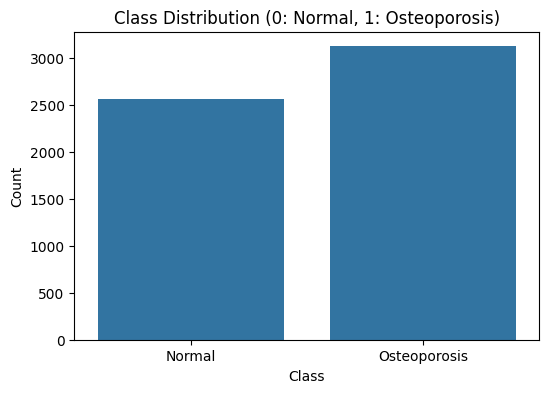

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title("Class Distribution (0: Normal, 1: Osteoporosis)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal', 'Osteoporosis'])
plt.show()

Checking differences in mean values in both classes to understand how it determines the output labels

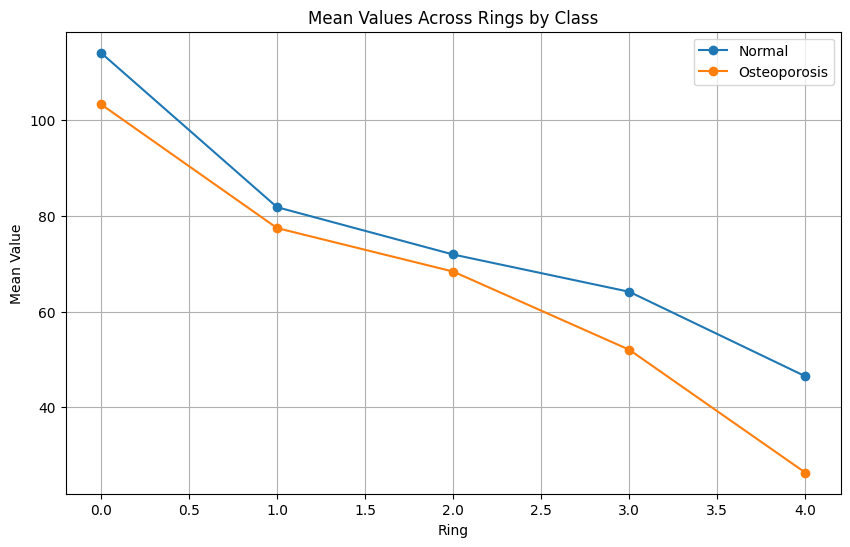

In [ ]:
mean_cols = [f"mean_{r}" for r in range(5)]
mean_normal = df[df['label'] == 0][mean_cols].mean()
mean_osteo = df[df['label'] == 1][mean_cols].mean()

plt.figure(figsize=(10, 6))
plt.plot(range(5), mean_normal, label='Normal', marker='o')
plt.plot(range(5), mean_osteo, label='Osteoporosis', marker='o')
plt.title("Mean Values Across Rings by Class")
plt.xlabel("Ring")
plt.ylabel("Mean Value")
plt.legend()
plt.grid(True)
plt.show()

Checking for multicollinearity in data:

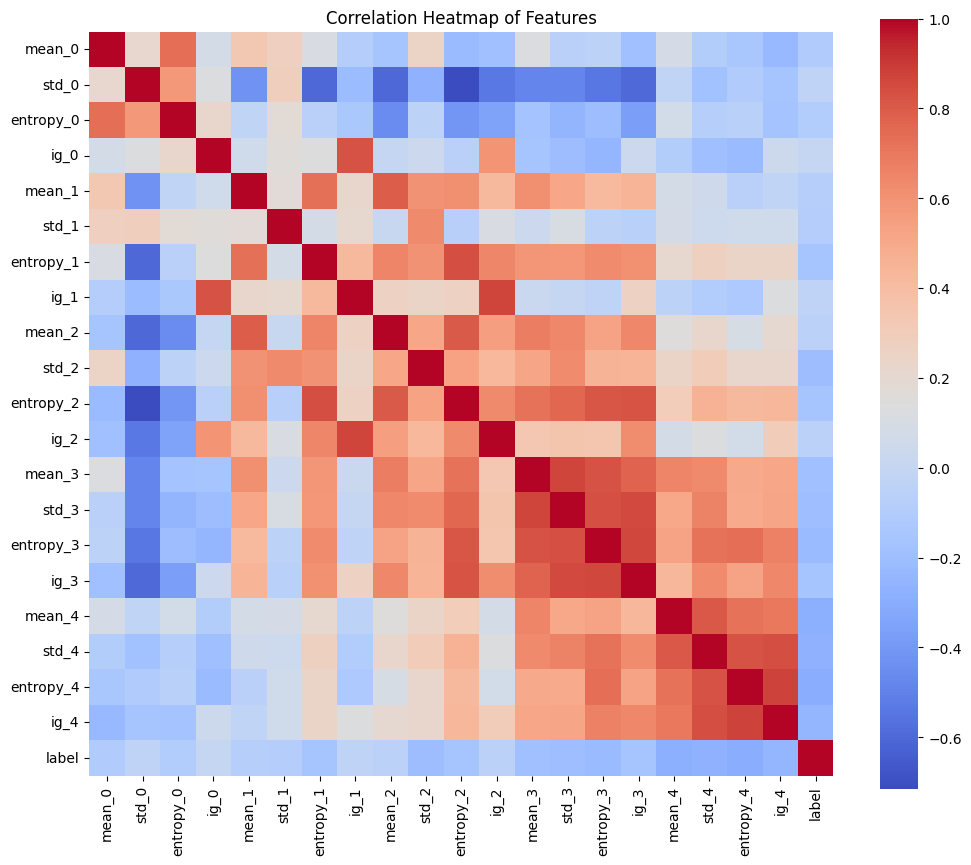

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

Checking relation of numerical columns

<Figure size 600x600 with 0 Axes>

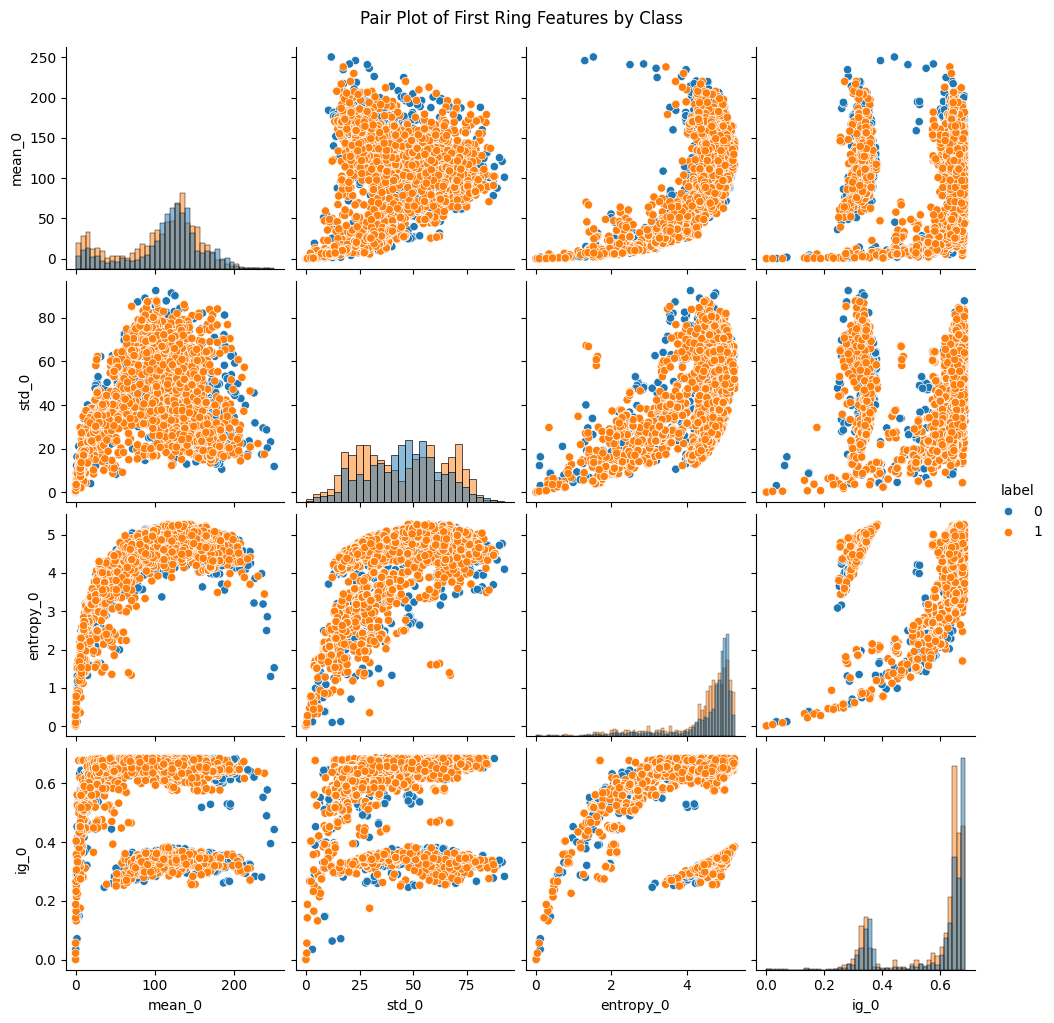

In [ ]:
# Pair plot for first ring features
plt.figure(figsize=(6,6))
subset_cols = ['mean_0', 'std_0', 'entropy_0', 'ig_0', 'label']
sns.pairplot(df[subset_cols], hue='label', diag_kind='hist')
plt.suptitle("Pair Plot of First Ring Features by Class", y=1.02)
plt.show()

Dividing the data into input data and output column: where the input is 20 columns of features extracted, and y is the label

In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
X=df.iloc[:, :20]
y=df.iloc[:, 20]

Performing train test split with a ratio of 0.2 to split the data into training set (used to train models) and testing set (to check accuracy and other metrics)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42, test_size=0.2)

In [ ]:
X_train.shape

(4555, 20)

<Axes: ylabel='entropy_0'>

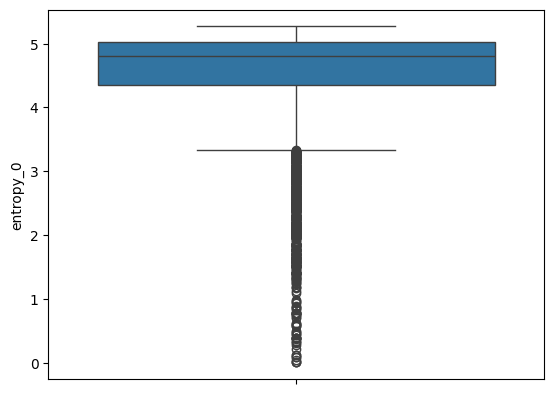

In [ ]:
sns.boxplot(df['entropy_0'])

As it is clearly visible in the boxplot, a significant amount of data lies below minimum value, so outlier removal is not beneficial here.

On applying various outlier removal methods, the accuracy scores were highly affected:
* IQR method: a loss of 10.2% of data
* Z-test: a loss of 16.12% of data
* Capping: a decrease in accuracy by 17%

Thus, it is clear that in our dataset these rows contribute to model training, but to ensure that model does not overfit, other techniques like scaling and robust models have been optimised.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dataset has been scaled so that the difference in ranges of the numerous columns do not make the models biased towards some particular features.

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
dt=DecisionTreeClassifier(random_state=0, max_depth=None)
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7734855136084284


Since the model seems to be performing decently, it is possible that more powerful tree based models will have better performance, so I explored more such models

Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=10)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")
cv_scores1 = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("Mean CV F1-Score:", cv_scores.mean())
print("Mean CV accuracy score:", cv_scores1.mean())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Mean CV F1-Score: 0.8475699329475059
Mean CV accuracy score: 0.8153677277716793

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       524
           1       0.79      0.93      0.86       615

    accuracy                           0.83      1139
   macro avg       0.85      0.82      0.83      1139
weighted avg       0.84      0.83      0.83      1139



K- Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")
cv_scores1 = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("Mean CV F1-Score:", cv_scores.mean())
print("Mean CV accuracy score:", cv_scores1.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Mean CV F1-Score: 0.8050869426461261
Mean CV accuracy score: 0.7747530186608123

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       524
           1       0.79      0.86      0.82       615

    accuracy                           0.80      1139
   macro avg       0.80      0.79      0.80      1139
weighted avg       0.80      0.80      0.80      1139



## Model training for 8 annular rings

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/features_8.csv")

In [ ]:
X=df.iloc[:, :32]
y=df.iloc[:, 32]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")
cv_scores1 = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("Mean CV F1-Score:", cv_scores.mean())
print("Mean CV accuracy score:", cv_scores1.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Mean CV F1-Score: 0.8387235218759717
Mean CV accuracy score: 0.8158068057080131

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       524
           1       0.82      0.88      0.85       615

    accuracy                           0.83      1139
   macro avg       0.84      0.83      0.83      1139
weighted avg       0.84      0.83      0.83      1139



Random Forest with VIF filtering

In [ ]:
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]
features_to_keep = vif_data[vif_data["VIF"] <= 20]["Feature"].tolist()
X_filtered = X_scaled_df[features_to_keep]
print(f"Shape after VIF filtering: {X_filtered.shape}")

Shape after VIF filtering: (5694, 11)


In [ ]:
rf_initial = RandomForestClassifier(random_state=42)
rf_initial.fit(X_filtered, y)

importances = rf_initial.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X_filtered.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

top_features = feature_importance_df.head(50)["Feature"].tolist()
X_selected = X_filtered[top_features]
print(f"Shape after feature selection: {X_selected.shape}")

Shape after feature selection: (5694, 11)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state=42, test_size=0.2)

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, None],
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, None], 'n_estimators': [100, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation accuracy score:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Best Cross-Validation accuracy score: 0.8169045005488474
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79       524
           1       0.80      0.91      0.85       615

    accuracy                           0.82      1139
   macro avg       0.83      0.82      0.82      1139
weighted avg       0.83      0.82      0.82      1139



XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

xgb_model = XGBClassifier(random_state=42,eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring="f1")
cv_scores1 = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring="accuracy")
print("Mean CV F1-Score:", cv_scores.mean())
print("Mean CV accuracy score:", cv_scores1.mean())
print("XGBoost Baseline Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Mean CV F1-Score: 0.8418528445807892
Mean CV accuracy score: 0.8201975850713501
XGBoost Baseline Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       524
           1       0.82      0.89      0.85       615

    accuracy                           0.84      1139
   macro avg       0.84      0.83      0.83      1139
weighted avg       0.84      0.84      0.84      1139



LightBGM

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier(random_state=42, verbose=-1)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")
cv_scores1 = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("Mean CV F1-Score:", cv_scores.mean())
print("Mean CV accuracy score:", cv_scores1.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Mean CV F1-Score: 0.8491305952985757
Mean CV accuracy score: 0.8241492864983535

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       524
           1       0.82      0.91      0.86       615

    accuracy                           0.84      1139
   macro avg       0.85      0.84      0.84      1139
weighted avg       0.85      0.84      0.84      1139



Hyperparameter Tuning LightGBM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=42)
param_dist_lgb = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
    'max_depth': [5, 10, 15],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}
lgb_search = RandomizedSearchCV(
    estimator=lgb_model, param_distributions=param_dist_lgb, n_iter=30,
    scoring='f1', cv=5, n_jobs=-1, random_state=42, verbose=1
)
lgb_search.fit(X_train, y_train)
tuned_lgbm = lgb_search.best_estimator_
print(f"Best LightGBM F1 Score: {lgb_search.best_score_:.4f}")
print(f"Best LightGBM Params: {lgb_search.best_params_}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 2512, number of negative: 2043
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 4555, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.551482 -> initscore=0.206660
[LightGBM] [Info] Start training from score 0.206660
Best LightGBM F1 Score: 0.8253
Best LightGBM Params: {'subsample': 0.8, 'num_leaves': 20, 'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")
cv_scores1 = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("Mean CV F1-Score:", cv_scores.mean())
print("Mean CV accuracy score:", cv_scores1.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Mean CV F1-Score: 0.84903616894546
Mean CV accuracy score: 0.8256860592755213

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       524
           1       0.82      0.89      0.85       615

    accuracy                           0.83      1139
   macro avg       0.84      0.83      0.83      1139
weighted avg       0.83      0.83      0.83      1139



Hyperparameter Tuning Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
param_dist_gb = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 8],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
}
gb_search = RandomizedSearchCV(
    estimator=gb_model, param_distributions=param_dist_gb, n_iter=30,
    scoring='f1_macro', cv=5, n_jobs=-1, random_state=42, verbose=1
)
gb_search.fit(X_train, y_train)
tuned_gb = gb_search.best_estimator_
print(f"Best Gradient Boosting F1 Score: {gb_search.best_score_:.4f}")
print(f"Best Gradient Boosting Params: {gb_search.best_params_}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Gradient Boosting F1 Score: 0.8200
Best Gradient Boosting Params: {'subsample': 1.0, 'n_estimators': 200, 'max_features': 'log2', 'max_depth': 8, 'learning_rate': 0.05}


Voting Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = XGBClassifier(random_state=42, eval_metric='logloss')
clf2 = lgb.LGBMClassifier(random_state=42, verbose=-1)
clf3 = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
clf4 = GradientBoostingClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)

model = VotingClassifier(
    estimators=[('xgb', clf1), ('lgbm', clf2), ('rf', clf3), ('gb', clf4)],
    voting='soft'
)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")
cv_scores1 = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("Mean CV F1-Score:", cv_scores.mean())
print("Mean CV accuracy score:", cv_scores1.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Mean CV F1-Score: 0.8533419164537062
Mean CV accuracy score: 0.829198682766191

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       524
           1       0.82      0.91      0.86       615

    accuracy                           0.84      1139
   macro avg       0.85      0.84      0.84      1139
weighted avg       0.85      0.84      0.84      1139



Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

estimators = [
    ('lgbm', lgb.LGBMClassifier(subsample=0.8, num_leaves=20, n_estimators=200, max_depth=15, learning_rate=0.1, colsample_bytree=0.8, random_state=42, verbose=-1)),
    ('gb', GradientBoostingClassifier(subsample=1.0, n_estimators=200, max_features='log2', max_depth=8, learning_rate=0.05, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42))]
meta_model = LogisticRegression(random_state=42)

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5)

print("Calculating Mean CV F1-Score for Stacking Classifier...")
cv_scores = cross_val_score(stacking_clf, X_train, y_train, cv=5, scoring="f1")
print(f"Mean CV F1-Score: {np.mean(cv_scores):.4f}\n")
print("Training the Stacking Classifier on the full training set...")
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)

print("\nClassification Report on Test Set (Stacking Model):")
print(classification_report(y_test, y_pred))

Calculating Mean CV F1-Score for Stacking Classifier...
Mean CV F1-Score: 0.8496

Training the Stacking Classifier on the full training set...

Classification Report on Test Set (Stacking Model):
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       524
           1       0.82      0.90      0.86       615

    accuracy                           0.84      1139
   macro avg       0.85      0.84      0.84      1139
weighted avg       0.84      0.84      0.84      1139



## Model training for 10 annular rings

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/features_10.csv")

In [ ]:
X=df.iloc[:, :40]
y=df.iloc[:, 40]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")
cv_scores1 = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("Mean CV F1-Score:", cv_scores.mean())
print("Mean CV accuracy score:", cv_scores1.mean())

y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Mean CV F1-Score: 0.8416488191993097
Mean CV accuracy score: 0.8190998902305159

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       524
           1       0.82      0.87      0.85       615

    accuracy                           0.83      1139
   macro avg       0.83      0.82      0.82      1139
weighted avg       0.83      0.83      0.83      1139



#Final model


The final model was chosen on the basis of both cross validation accuracy as well as F1 score is Voting Ensemble, which combines 4 of the most well performing classifiers- LightGBM, Gradient Boost, XGBoost, and Random Forest. This is done on the 8-rings dataset.

In [8]:
df=pd.read_csv("/content/drive/MyDrive/features_8.csv")

In [9]:
X=df.iloc[:, :32]
y=df.iloc[:, 32]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42, test_size=0.2)

In [15]:
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

clf1 = XGBClassifier(random_state=42, eval_metric='logloss')
clf2 = lgb.LGBMClassifier(random_state=42, verbose=-1)
clf3 = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
clf4 = GradientBoostingClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)

model = VotingClassifier(
    estimators=[('xgb', clf1), ('lgbm', clf2), ('rf', clf3), ('gb', clf4)],
    voting='soft'
)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")
cv_scores1 = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("Mean CV F1-Score:", cv_scores.mean())
print("Mean CV accuracy score:", cv_scores1.mean())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Mean CV F1-Score: 0.8533419164537062
Mean CV accuracy score: 0.829198682766191


In [16]:
import joblib

model_filename = 'voting_classifier_osteoporosis.pkl'
joblib.dump(model, model_filename)

['voting_classifier_osteoporosis.pkl']

In [17]:
loaded_model = joblib.load(model_filename)
y_pred_loaded = loaded_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_loaded))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       524
           1       0.82      0.91      0.86       615

    accuracy                           0.84      1139
   macro avg       0.85      0.84      0.84      1139
weighted avg       0.85      0.84      0.84      1139



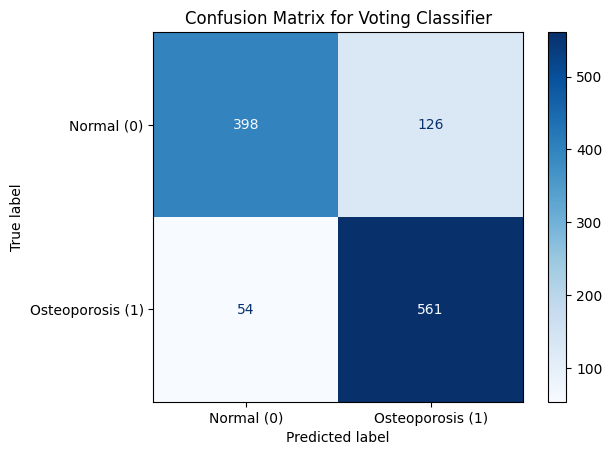

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal (0)', 'Osteoporosis (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Voting Classifier")
plt.show()

Top 10 Most Important Features:
      Feature  RandomForest  GradientBoosting  AverageImportance
1       std_0      0.077571          0.131874           0.104722
26  entropy_6      0.052720          0.075111           0.063916
24     mean_6      0.043351          0.060679           0.052015
2   entropy_0      0.043449          0.045212           0.044331
29      std_7      0.039321          0.039246           0.039284
0      mean_0      0.032966          0.044672           0.038819
11       ig_2      0.027699          0.040222           0.033961
3        ig_0      0.034748          0.028210           0.031479
6   entropy_1      0.032900          0.029870           0.031385
7        ig_1      0.030795          0.031446           0.031120


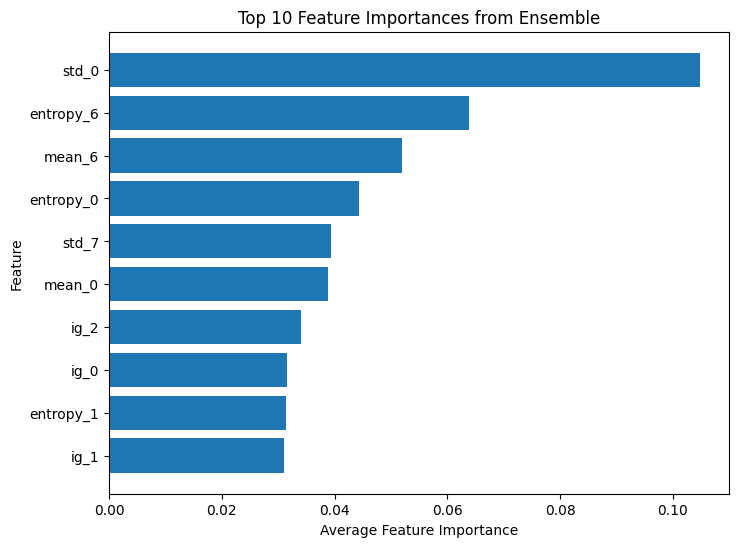

In [24]:
rf_model = model.named_estimators_['rf']
gb_model = model.named_estimators_['gb']

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': rf_model.feature_importances_,
    'GradientBoosting': gb_model.feature_importances_
})

importance_df['AverageImportance'] = importance_df[['RandomForest', 'GradientBoosting']].mean(axis=1)
importance_df = importance_df.sort_values(by='AverageImportance', ascending=False)

print("Top 10 Most Important Features:")
print(importance_df.head(10))

plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'].head(10), importance_df['AverageImportance'].head(10))
plt.xlabel("Average Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances from Ensemble")
plt.gca().invert_yaxis()
plt.show()

Now that we have a high-performing model, we need to ensure its predicted probabilities are reliable. A calibration curve helps us visualize this. The closer our model's line is to the dashed "perfectly calibrated" line, the more we can trust its confidence scores, which is crucial in a medical context.

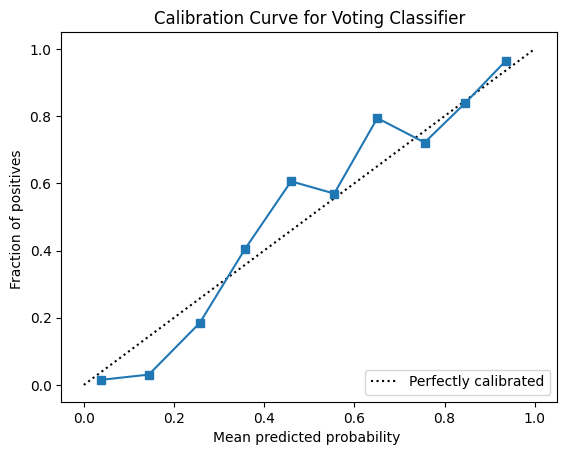

In [20]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve, CalibrationDisplay

y_probs = model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10, strategy='uniform')
disp = CalibrationDisplay(prob_true, prob_pred, y_probs)
disp.plot()
plt.title("Calibration Curve for Voting Classifier")
plt.show()

To understand why our ensemble model makes its decisions, we can use SHAP (SHapley Additive exPlanations). This powerful technique shows the impact of each feature on the model's output for every single prediction. The summary plots will help us identify which features are most influential overall and how their values (high or low) push the prediction towards "Normal" or "Osteoporosis".


Generating SHAP Summary Plot...


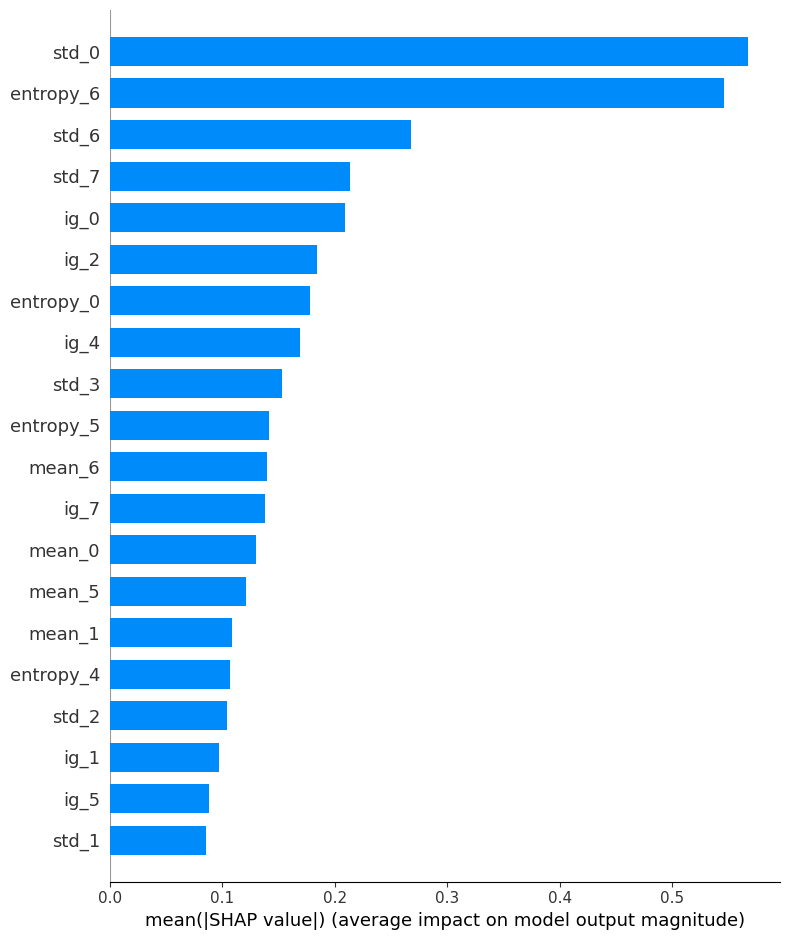

In [29]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

fitted_lgbm = model.named_estimators_['lgbm']
explainer = shap.TreeExplainer(fitted_lgbm)
shap_values = explainer.shap_values(X_test)

print("\nGenerating SHAP Summary Plot...")
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.show()

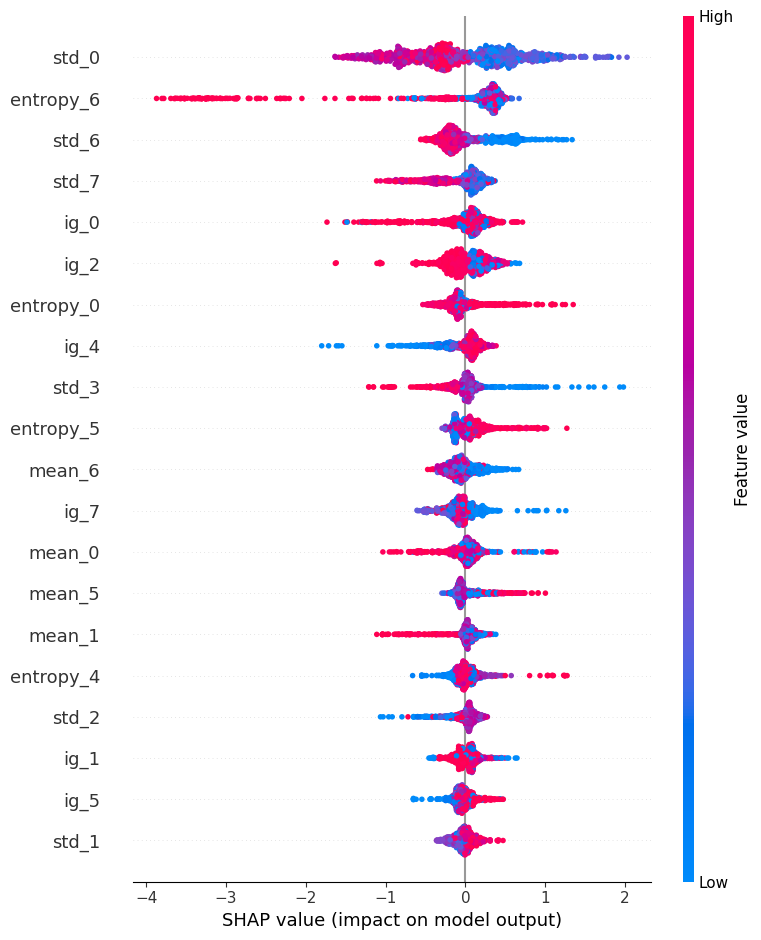

In [30]:
shap.summary_plot(shap_values, X_test)